In [1]:
#statsmodel library for timeseries forecasting
!pip3 install statsmodels -U

In [2]:
!mkdir data
!mkdir plots

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Downloading employment data by industry from Labour Market Information Portal (lmip.gov.au) and saving into excel files.**

In [4]:
!wget = 'https://lmip.gov.au/PortalFile.axd?FieldID=3195450&.xlsx'
!mv 'PortalFile.axd?FieldID=3195450&.xlsx' 'data/employment_by_industry_nov2021.xlsx'


!wget = 'https://lmip.gov.au/PortalFile.axd?FieldID=3195451&.xlsx'
!mv 'PortalFile.axd?FieldID=3195451&.xlsx' 'data/employment_by_industry_time_series.xlsx'



--2022-01-16 11:13:06--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-01-16 11:13:06--  https://lmip.gov.au/PortalFile.axd?FieldID=3195450&.xlsx
Resolving lmip.gov.au (lmip.gov.au)... 165.12.220.23, 2406:4c00:0:220::23
Connecting to lmip.gov.au (lmip.gov.au)|165.12.220.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from lmip.gov.au attempted to set domain to prod.idc
Cookie coming from lmip.gov.au attempted to set domain to prod.idc
Length: unspecified [octet-stream]
Saving to: ‘PortalFile.axd?FieldID=3195450&.xlsx’

PortalFile.axd?Fiel     [  <=>               ]  64.53K   165KB/s    in 0.4s    

2022-01-16 11:13:08 (165 KB/s) - ‘PortalFile.axd?FieldID=3195450&.xlsx’ saved [66075]

FINISHED --2022-01-16 11:13:08--
Total wall clock time: 1.4s
Downloaded: 1 files, 65K in 0.4s (165 KB/s)
--2022-01-16 11:13:08--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable

##November 2021, Employment by Industry data.




**Extracting data from excel and storing it into a data frame.**

In [5]:
df_emp_ind_nov2021 = pd.read_excel('data/employment_by_industry_nov2021.xlsx', sheet_name=1)
print(df_emp_ind_nov2021.shape)

(874, 10)


In [6]:
print(df_emp_ind_nov2021.columns)

Index(['Employment Region', 'State/Territory', 'Industry',
       'Employment by Industry - Total', 'Employed Full-Time',
       'Employed Part-Time', 'Employed - Male', 'Employed - Female',
       'Five year growth by Industry', 'Employment Distribution (%)'],
      dtype='object')


**Fetching the unique values from the Industry column to find out tech sectors.**

In [7]:
df_emp_ind_nov2021['Industry'].unique()

array(['Agriculture, Forestry and Fishing', 'Mining', 'Manufacturing',
       'Electricity, Gas, Water and Waste Services', 'Construction',
       'Wholesale Trade', 'Retail Trade',
       'Accommodation and Food Services',
       'Transport, Postal and Warehousing',
       'Information Media and Telecommunications',
       'Financial and Insurance Services',
       'Rental, Hiring and Real Estate Services',
       'Professional, Scientific and Technical Services',
       'Administrative and Support Services',
       'Public Administration and Safety', 'Education and Training',
       'Health Care and Social Assistance',
       'Arts and Recreation Services', 'Other Services'], dtype=object)

**Analysing the State/Territory column.**

In [8]:
df_emp_ind_nov2021['State/Territory'].unique()

array(['NSW/ACT', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'AUST'],
      dtype=object)

Storing the tech sector value into a variable.

In this analysis, we are considering only *Information Media and Telecommunications* as tech sector but other industries such as *Professional, Scientific and Technical Services* also includes tech jobs.


In [9]:
tech_sector= 'Information Media and Telecommunications'  #, 'Professional, Scientific and Technical Services']

In [10]:
df_emp_ind_nov2021[(df_emp_ind_nov2021['Industry'] == tech_sector) & (df_emp_ind_nov2021['State/Territory'] == 'AUST')]

,Employment Region,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
864,Australia,AUST,Information Media and Telecommunications,192500,144300,40000,99400,87000,-23800,1.5


**Break down by gender and employment type.**

In [11]:
emp_ind_dict = df_emp_ind_nov2021[(df_emp_ind_nov2021['Industry'] == tech_sector) & (df_emp_ind_nov2021['State/Territory'] == 'AUST')].to_dict('records')[0]
emp_ind_gender = {'male': emp_ind_dict['Employed - Male'],
                  'female': emp_ind_dict['Employed - Female']}
print(emp_ind_gender)


emp_ind_employed = {'Full-Time': emp_ind_dict['Employed Full-Time'],
                  'Part-Time': emp_ind_dict['Employed Part-Time']}
emp_ind_employed


{'male': 99400, 'female': 87000}


{'Full-Time': 144300, 'Part-Time': 40000}

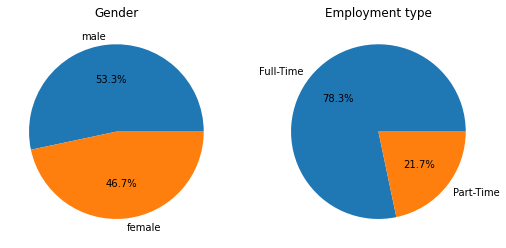

In [12]:
fig = plt.figure(figsize =(18, 10))

ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(emp_ind_gender.values(), labels = emp_ind_gender.keys(), autopct='%1.1f%%')
plt.title('Gender')
#next one
ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(emp_ind_employed.values(), labels = emp_ind_employed.keys(), autopct='%1.1f%%')
plt.title('Employment type')
plt.savefig('plots/Gender_and_Employment_type.png')

**Analysing different industry employment distribution in Australia.**

In [13]:
df_emp_ind_nov2021[(df_emp_ind_nov2021['State/Territory'] == 'AUST')]

,Employment Region,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
855,Australia,AUST,"Agriculture, Forestry and Fishing",316100,212100,95800,200800,105800,22100,2.4
856,Australia,AUST,Mining,271300,259500,11900,222800,48600,47600,2.1
857,Australia,AUST,Manufacturing,864300,773200,161100,667700,273100,-107800,6.5
858,Australia,AUST,"Electricity, Gas, Water and Waste Services",134100,136600,11800,111800,35700,-1900,1.0
859,Australia,AUST,Construction,1143600,965300,173100,995300,145900,77900,8.6
860,Australia,AUST,Wholesale Trade,359000,288900,69600,238000,122100,-1900,2.7
861,Australia,AUST,Retail Trade,1281300,657500,621800,594800,687200,42700,9.7
862,Australia,AUST,Accommodation and Food Services,849500,317500,525300,382500,465900,-4300,6.4
863,Australia,AUST,"Transport, Postal and Warehousing",655300,501600,145800,511600,137700,40800,5.0
864,Australia,AUST,Information Media and Telecommunications,192500,144300,40000,99400,87000,-23800,1.5


In [14]:
emp_ind_dict1 = df_emp_ind_nov2021[(df_emp_ind_nov2021['State/Territory'] == 'AUST')]
emp_ind_dict1 = emp_ind_dict1[['Industry','Employment Distribution (%)']]


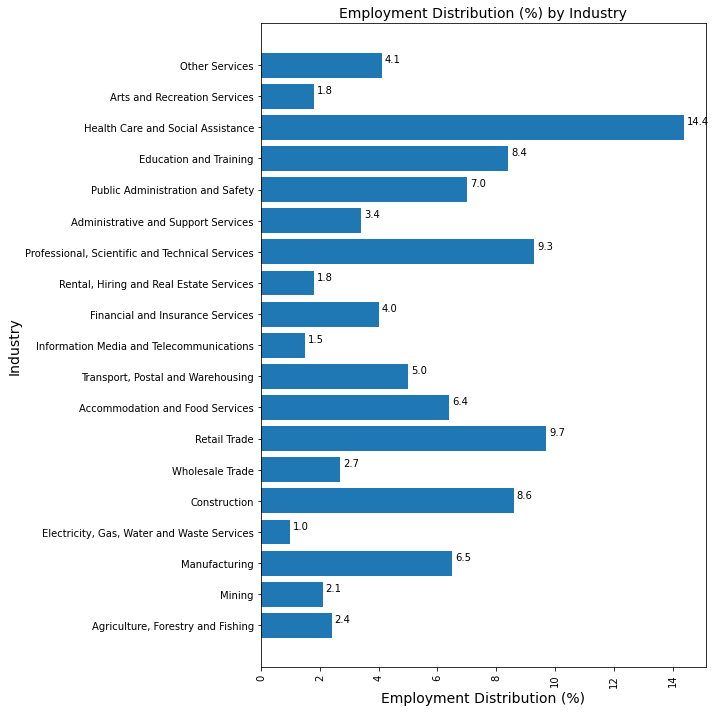

In [15]:
fig, ax = plt.subplots(figsize =(10, 10))

plt.barh(emp_ind_dict1['Industry'],emp_ind_dict1['Employment Distribution (%)'])
plt.title('Employment Distribution (%) by Industry', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.xlabel('Employment Distribution (%)', fontsize=14)
plt.xticks(rotation=90)

for i, v in enumerate(emp_ind_dict1['Employment Distribution (%)']):
  plt.text(v+0.1,i+0.1, str(v))

plt.tight_layout()

plt.savefig('plots/Employment_Distribution_by_Industry.png')

In [16]:
emp_ind_dict2 = df_emp_ind_nov2021[(df_emp_ind_nov2021['Industry'] == tech_sector)]

emp_ind_dict2.drop('Employment Region', inplace=True, axis=1)
emp_ind_dict2.drop('Industry', inplace=True, axis=1)
emp_ind_dict2=emp_ind_dict2.groupby(by=["State/Territory"], dropna=False).sum()
emp_ind_dict2 = emp_ind_dict2.drop("AUST")
emp_ind_dict2=emp_ind_dict2.reset_index(level=['State/Territory'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Employment type by state and gender by state.**



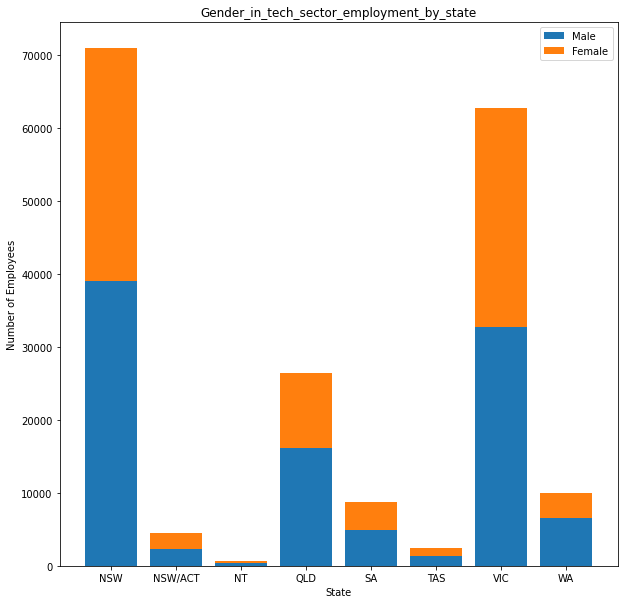

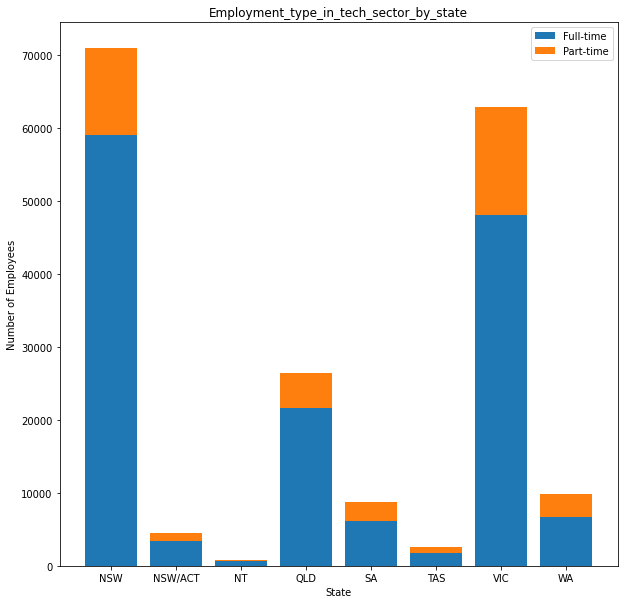

In [17]:
fig = plt.figure(figsize =(10, 10))


plt.bar(emp_ind_dict2['State/Territory'], emp_ind_dict2['Employed - Male'])
plt.bar(emp_ind_dict2['State/Territory'], emp_ind_dict2['Employed - Female'],bottom=emp_ind_dict2['Employed - Male'])
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.legend(['Male','Female'])
plt.title('Gender_in_tech_sector_employment_by_state')
plt.savefig('plots/Gender_by_state.png')

fig = plt.figure(figsize =(10, 10))


plt.bar(emp_ind_dict2['State/Territory'], emp_ind_dict2['Employed Full-Time'])
plt.bar(emp_ind_dict2['State/Territory'], emp_ind_dict2['Employed Part-Time'],bottom=emp_ind_dict2['Employed Full-Time'])
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.legend(['Full-time','Part-time'])
plt.title('Employment_type_in_tech_sector_by_state')

plt.savefig('plots/Employment_type_by_state.png')

## Time series analysis: Forecasting

**Extracting data from excel and storing it into a data frame.**

In [18]:
df_emp_ind_ts = pd.read_excel('data/employment_by_industry_time_series.xlsx', sheet_name=1)
print(df_emp_ind_ts.head(5))

  Employment Region State/Territory  ... 2020-11-01 00:00:00  2016-11-01 00:00:00
0    Capital Region         NSW/ACT  ...                3300                 6200
1    Capital Region         NSW/ACT  ...                 800                  500
2    Capital Region         NSW/ACT  ...                7300                 8900
3    Capital Region         NSW/ACT  ...                3300                 2900
4    Capital Region         NSW/ACT  ...               31600                25400

[5 rows x 6 columns]


In [19]:
df_emp_ind_ts_dict = df_emp_ind_ts[(df_emp_ind_ts['Industry'] == tech_sector) & (df_emp_ind_ts['State/Territory'] == 'AUST')].to_dict('records')[0]


In [20]:
df_emp_ind_ts_dict.pop('Employment Region')
df_emp_ind_ts_dict.pop('Industry')
df_emp_ind_ts_dict.pop('State/Territory')



'AUST'

In [21]:
df_emp_ind_ts_dict

{datetime.datetime(2016, 11, 1, 0, 0): 216400,
 datetime.datetime(2020, 11, 1, 0, 0): 196000,
 datetime.datetime(2021, 11, 1, 0, 0): 192500}

In [22]:
df_ts = pd.DataFrame.from_dict(df_emp_ind_ts_dict, orient='index', columns=['employment'])
df_ts #.columns=['date', 'employment']

,employment
2021-11-01,192500
2020-11-01,196000
2016-11-01,216400


The given dataset has only 3 data points from 2016 to 2021, with the data for 2017, 2018, and 2019 missing. Using pandas interpolate method to fill the missing values for 2017, 2018, and 2019.

In [23]:
time_index = pd.date_range(start="11/01/2016", end='11/01/2021', freq=pd.DateOffset(years=1))
emp_vals = [216400, np.nan, np.nan, np.nan, 196000, 192500]

df_ts2 = pd.DataFrame(index=time_index)
df_ts2['emp'] = emp_vals

df_ts2 = df_ts2.interpolate()
df_ts2

,emp
2016-11-01,216400.0
2017-11-01,211300.0
2018-11-01,206200.0
2019-11-01,201100.0
2020-11-01,196000.0
2021-11-01,192500.0


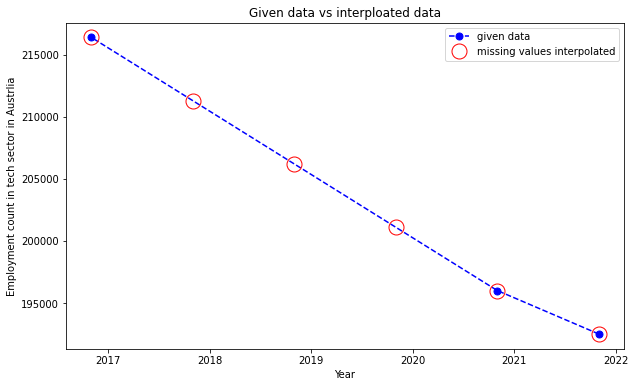

In [24]:
fig = plt.figure(figsize =(10, 6))
plt.plot(df_ts, '--bo',label='given data',ms=7)
plt.plot(df_ts2, '*r',label='missing values interpolated',marker='o',fillstyle='none',ms=15)
plt.xlabel('Year')
plt.ylabel('Employment count in tech sector in Austrlia')
plt.title('Given data vs interploated data')
plt.legend()
plt.savefig('plots/Given_data_vs_interploated_data.png')

**Building an autoregression model to predict the future forecast of the data.**

In [25]:
from statsmodels.tsa.ar_model import AutoReg


In [26]:

#Autoregerssion
model = AutoReg(df_ts2['emp'], lags=1)
model_fit = model.fit()

yhat = model_fit.predict(6, 9)
print(yhat)

2022-11-01    188579.607843
2023-11-01    184905.201077
2024-11-01    181461.345323
2025-11-01    178233.574636
Freq: <DateOffset: years=1>, dtype: float64


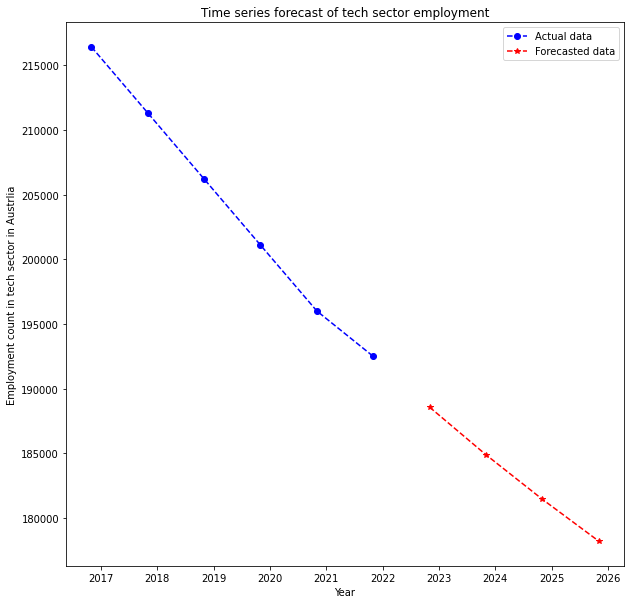

In [27]:
fig = plt.figure(figsize =(10, 10))
plt.plot(df_ts2,'--bo',label='Actual data')
plt.plot(yhat,'--*r',label='Forecasted data')
plt.xlabel('Year')
plt.ylabel('Employment count in tech sector in Austrlia')
plt.title('Time series forecast of tech sector employment')
plt.legend()
plt.savefig('plots/Time_series_forecast.png')

**Summary:**


* Employment data by industry from Labour Market Information Portal (lmip.gov.au) is analysed to forecast employment in the tech sector in 2025.
* As of November 2021, the number of people working in the tech sector in Australia is 192,500.

* In this analysis, we are considering only Information Media and Telecommunications as tech sector but other industries such as Professional, Scientific and Technical Services also includes tech jobs.

* The dataset has only 3 data points from 2016 to 2021 with the number of employees 2016: 216400, 2020:196000 and 2021: 192500 in the tech sector. This shows a roughly 11% drop over five years period, that is a 2.2% drop per annum.

* The interpolation method is used to fill the missing values for the years 2017, 2018 and 2019. The interpolated values align well with the trend from 2016 to 2021 as can be seen from the "Given data vs interpolated data" plot.

* As the number of data points is only 6, a very simply autoregression method is used to forecast for the next 4 years until 2025. 

* The model is not validated by dividing the data into train and test as the number of data for the training itself is only 6.

* The forecasted employment in the tech sector for 2025 is 178233. This is a further 7.4% drop from the current 2021 employment.

* The forecasted value is significantly smaller (roughly 82%) than the Tech council of Australia's goal of I million tech jobs by 2025.

* As mentioned above, the main caveat of this analysis is that only 

* Information Media and Telecommunications is considered as the tech sector, which ignores many other possible tech sectors.
 